# Group 47
By: Issac Samuel, Ryan Esquino, and Lucas Weiland

# Introduction
This repository looks to find the best area for Homer Simpson to live in based on the following categories: number of donut shops (50% weight), bars (40% weight), and convenience stores (10% weight) in each area. One alternative area that we were looking to explore was the average snowfall in an area due to Homer being Mr.Plow in the show. However, there was no dataset with that information. The best area is determined based on the lowest sum of each ranking of an area in the specific category times its weight. If the number of donut shops, for example, in Moon township is ranked second, bars third, and convenience stores sixth, then Moon's overall score would equal: (2 * 0.5) + (3 * 0.4) + (6 * 0.1) = 2.8.

# The Metrics

1. **Convenience Stores**: Due to Homer's love for unhealthy foods and the Kwik-E-Mart, we used convenience stores in the area as one of our metrics (10% weight).
2. **Bars**: Homer loves beer, so in order to determine the best place for him to live, the neighborhoods with the most places with bars or resturants that serve alcohol is one of our metrics. (40% weight)

## Convienience Stores

Import necessary tools in order to implement the correct mapping for municipals

In [55]:
import pandas as pd
import numpy as np
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors

#Dictionary containing each municipal code in pittsburgh to their respective municipal name
municipal_hash = {
    'pittsburgh-119': 'wall',
    'pittsburgh-104': 'sharpsburg',
    'pittsburgh-124': 'west view',
    'pittsburgh-129': 'wilkinsburg',
    'pittsburgh-113': 'thornburg',
    'pittsburgh-110': 'stowe',
    'pittsburgh-111': 'swissvale',
    'pittsburgh-115': 'turtle creek',
    'pittsburgh-112': 'tarentum',
    'pittsburgh-126': 'white oak',
    'pittsburgh-114': 'trafford',
    'pittsburgh-108': 'springdale',
    'pittsburgh-106': 'south park',
    'pittsburgh-102': 'central business district',
    'pittsburgh-107': 'south versailles',
    'pittsburgh-120': 'west deer',
    'pittsburgh-123': 'west mifflin',
    'pittsburgh-109': 'springdale',
    'pittsburgh-116': 'upper st. clair',
    'pittsburgh-131': '0',
    'pittsburgh-101': 'sewickley hts.',
    'pittsburgh-128': 'wilkins',
    'pittsburgh-121': 'west elizabeth',
    'pittsburgh-105': 'south fayette',
    'pittsburgh-122': 'west homestead',
    'pittsburgh-127': 'whitehall',
    'pittsburgh-132': '0',
    'pittsburgh-118': 'versailles',
    'pittsburgh-103': 'shaler',
    'pittsburgh-117': 'verona',
    'pittsburgh-125': 'whitaker',
    'pittsburgh-130': 'wilmerding',
    'east pittsburgh': '0'
}

Cut down data to only the relevant attributes (description, municipal, x, y) and display all the relevant convenience stores table

In [56]:
#Read initial data
stores = pd.read_csv("data/stores.csv")

#Retain only description, municipal, and coordinates of all stores. Drop any that do not contain this information.
gas = stores[['description', 'municipal', 'x', 'y']]
gas = gas.dropna()

row_labels = {"Pittsburgh-111":"Garfield","Pittsburgh-112":"Larimer","Pittsburgh-113":"Homewood","Pittsburgh-114":"Squirrel Hill","Pittsburgh-115":"Greenfield","Pittsburgh-116":"South Side Slopes","Pittsburgh-117":"South Side Flats","Pittsburgh-118":"Allentown","Pittsburgh-119":"South Shore","Pittsburgh-120":"Banksville","Pittsburgh-121":"Chateau","Pittsburgh-122":"Allegheny Center","Pittsburgh-123":"East Allegheny","Pittsburgh-124":"Spring Hill City View","Pittsburgh-125":"Central North Side","Pittsburgh-126":"Perry South","Pittsburgh-127":"Marshall Shadeland","Pittsburgh-128":"Oakwood","Pittsburgh-129":"Carrick","Pittsburgh-130":"Knoxville","Pittsburgh-131":"Lincoln Place","Pittsburgh-132":"Overbrook","Pittsburgh-101":"Downtown",'Pittsburgh-102': 'central business district',"Pittsburgh-103":"Downtown","Pittsburgh-104":"Oakland","Pittsburgh-105":"Middle Hill","Pittsburgh-106":"Polish Hill","Pittsburgh-107":"Shadyside","Pittsburgh-108":"Bloomfield","Pittsburgh-109":"Central Lawrenceville","Pittsburgh-110":"Upper Lawrenceville", "Allegheny Center":"Allegheny West","Allentown":"Allentown","Banksville":"Banksville","Bloomfield":"Bloomfield","Downtown":"Central Business District","Downtown":"Central Business District","Downtown":"Central Business District","Oakland":"Central Oakland"}

#Make all descriptions lowercase for simplicity of filtering (convenience stores and parsing municipal codes)
gas['description'] = gas['description'].apply(str.lower)
gas = gas[gas['description'].str.contains('convenience store')].reset_index()


#Change all entries with codes to municipal names
index = 0
for row in gas.iterrows():
    try:
        m = str(row[1].municipal)
        value = row_labels[m]
        gas.at[index,'municipal'] = value
    except:
        continue
    finally:
        index += 1

gas['municipal'] = gas['municipal'].apply(str.lower)
display(gas)

,index,description,municipal,x,y
0,24,chain retail/convenience store,moon,-80.225735,40.513316
1,35,retail/convenience store,south shore,-80.012848,40.421550
2,54,chain retail/convenience store,west elizabeth,-79.896190,40.273015
3,85,chain retail/convenience store,sharpsburg,-79.936753,40.494810
4,95,chain retail/convenience store,oakland,-79.948574,40.444715
...,...,...,...,...,...
2470,28560,retail/convenience store,homestead,-79.908081,40.408169
2471,28566,retail/convenience store,braddock,-79.869161,40.407309
2472,28567,chain retail/convenience store,kennedy,-80.094929,40.474372
2473,28583,chain retail/convenience store,mccandless,-80.040143,40.565862


For each municipal, the count of convenience stores is taken and put into a dataframe. The dataframe is then sorted by the number of convenience stores in descending order and plotted on a bar graph (top 20). A heatmap is also provided, showing where the majority of the stores are located in Pittsburgh.

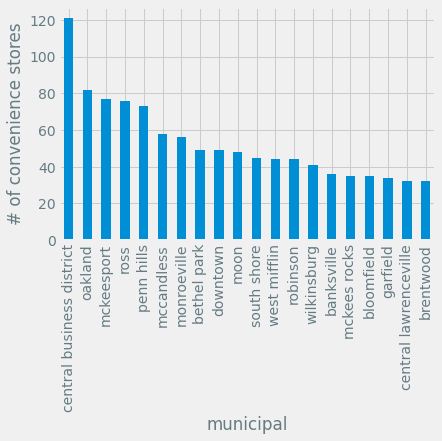

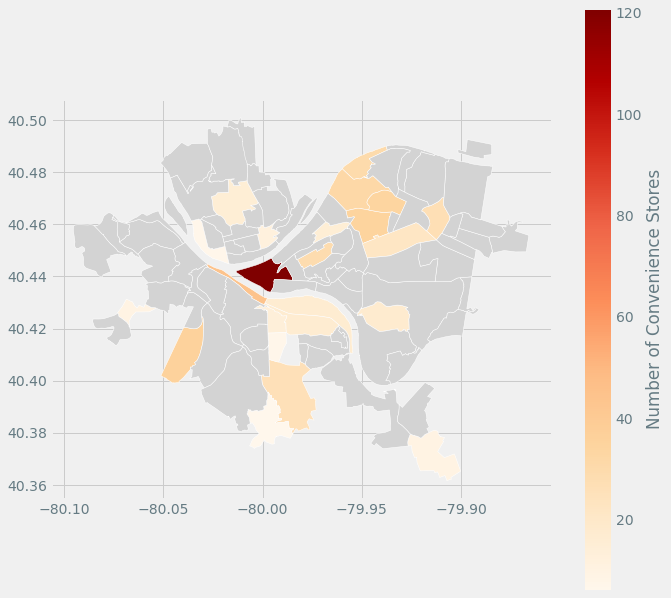

In [57]:
#Get values of each municipal's convenience store total and plot the top 20
municipal_count_df = pd.DataFrame(gas.groupby('municipal')['municipal'].count())
municipal_count_df.columns = ['# of convenience stores']
municipal_count_df = municipal_count_df[1:]
municipal_count_df = municipal_count_df.sort_values(by='# of convenience stores', ascending=False)
plt.style.use('fivethirtyeight')
municipal_count_df.head(20).plot(kind='bar', legend=False)
plt.ylabel('# of convenience stores')
plt.show()

neighborhoods = gp.read_file("neighborhood_data/Neighborhoods_.shp")
neighborhoods['hood'] = neighborhoods['hood'].apply(str.lower)
municipal_count_df = municipal_count_df.reset_index()

# Display heat map of convenience stores
cvMaps = neighborhoods.merge(municipal_count_df, how='left', left_on='hood', right_on='municipal')
ax = cvMaps.plot(column='# of convenience stores', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Convenience Stores"}, # label the legend
               figsize=(10, 10),         # set the size
               missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               )

The municipal cordinates are taken from the original dataset in order to be plotted on a shape file. A custom color scale from transparent to yellow was made in order to be used for the hexbin graph later on. The charts below shows each convenience store throughout Pittsburgh based on the original dataset.

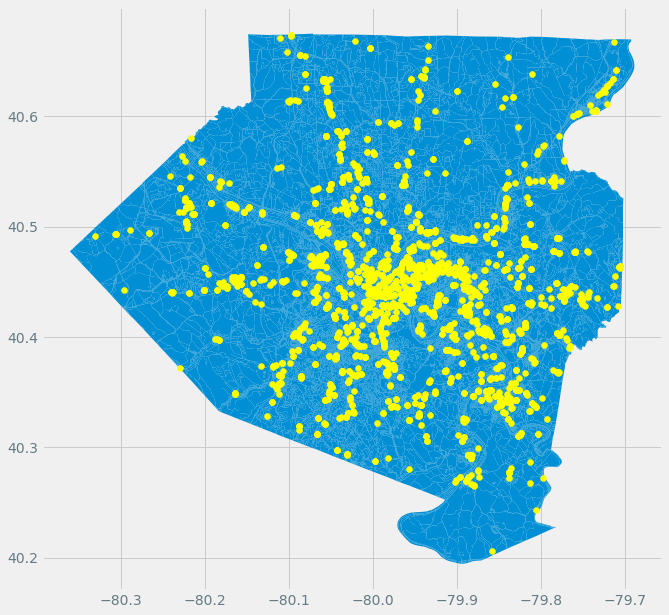

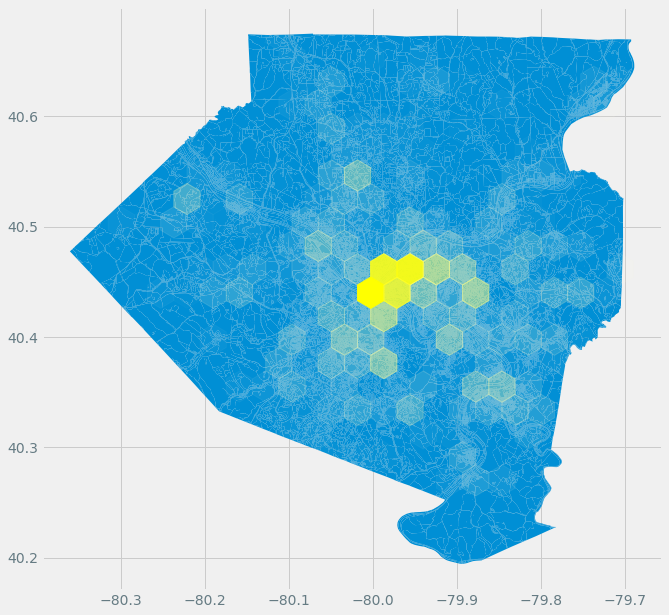

In [58]:
#Municipal coordinates for plotting them on the municipal map
municipal_cords = gas[['x','y']]

#Custom colors for heatmap (transparent to yellow)
c_white = matplotlib.colors.colorConverter.to_rgba('white',alpha = 0)
c_black= matplotlib.colors.colorConverter.to_rgba('yellow',alpha = 1)
cmap_rb = matplotlib.colors.LinearSegmentedColormap.from_list('rb_cmap',[c_white,c_black],512)

x, y = gas['x'].values, gas['y'].values

#Map view of each convenience store
shapefile = gpd.read_file('map_data/tl_2019_42003_faces.shp')
fig, ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax)
ax.scatter(x = x,y = y, c='yellow')

#Heat map view of each convenience store
shapefile2 = gpd.read_file('map_data/tl_2019_42003_faces.shp')
fig2, ax2 = plt.subplots(figsize=(10,10))
shapefile2.plot(ax=ax2)
ax2.hexbin(x = x,y = y, cmap=cmap_rb, gridsize=20)

Ranking values are calcuated based on the weight (10%) times the original ranking and then data is sorted from the low to high.

In [60]:
#Ranking of each municipal
municipal_count_df = municipal_count_df.sort_values(by='# of convenience stores', ascending=False)
municipal_count_df['rank'] = municipal_count_df['# of convenience stores'].rank(ascending=False)
municipal_count_df['rank_value'] = municipal_count_df['# of convenience stores'].rank(ascending=False) * 0.1
display(municipal_count_df)

,municipal,# of convenience stores,rank,rank_value
0,central business district,121,1.0,0.1
1,oakland,82,2.0,0.2
2,mckeesport,77,3.0,0.3
3,ross,76,4.0,0.4
4,penn hills,73,5.0,0.5
...,...,...,...,...
134,east deer,1,136.0,13.6
135,lincoln,1,136.0,13.6
136,east mckeesport,1,136.0,13.6
137,mcdonald,1,136.0,13.6


## Bars

In order to analyze the data, I had to import pandas and other graphic packages

In [61]:
import pandas as pd
import numpy as np
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors

First I had to read in the data

In [62]:
foodFacilities = pd.read_csv("Geocoded Food Facilities.csv")

Then I filtered the data set and deduced what was labeled as bars or resturaunts with liquor.

In [63]:
description = pd.DataFrame(foodFacilities['description'])
dropDupes = description.drop_duplicates()
storesWithLiquor = dropDupes.loc[description['description'].str.contains("(?i)with liquor")]

In [64]:
storesWithLiquor.head(10)

,description
2,Restaurant with Liquor
6,Firehall with Liquor
28,Chain Restaurant with Liquor
595,Pool Snack Bar/With Liquor


With that information, I separated the data with those labels from the original dataset

In [65]:
typeOfPlace = foodFacilities.loc[foodFacilities['description'] == "Restaurant with Liquor"]
typeOfPlace = pd.concat([typeOfPlace,foodFacilities.loc[foodFacilities['description'] == "Chain Restaurant with Liquor"]])
typeOfPlace = pd.concat([typeOfPlace,foodFacilities.loc[foodFacilities['description'] == "Firehall with Liquor"]])
typeOfPlace = pd.concat([typeOfPlace,foodFacilities.loc[foodFacilities['description'] == "Pool Snack Bar/With Liquor"]])
typeOfPlace.sample(3)

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
53,36869,Holiday Bar,4620,Forbes Ave,Pittsburgh,PA,15213.0,Pittsburgh-104,201,Restaurant with Liquor,...,1976-01-01,NaN,33.0,NaN,NaN,7,NaN,-79.948370,40.444470,4620 Forbes Ave PA 15213
10793,200502090008,Jackie & Bill,800,Greensburg Pike,North Versailles,PA,15137.0,North Versailles,201,Restaurant with Liquor,...,2005-02-07,2010-11-19,74.0,NaN,NaN,7,1.0,-79.819372,40.390588,800 Greensburg Pike PA 15137
4689,47220,Carmassi Tuscany Grill,711,Penn Ave,Pittsburgh,PA,15222.0,Pittsburgh-102,201,Restaurant with Liquor,...,1991-06-17,NaN,120.0,NaN,NaN,7,NaN,-79.884148,40.443722,711 Penn Ave PA 15222


Then from the resturaunts with liquor and bars, I further filtered it to only include places that were in the city of Pittsburgh

In [66]:
typeOfPlace = typeOfPlace.loc[typeOfPlace['city'] == 'Pittsburgh']

addr = typeOfPlace["address"]
municipal = typeOfPlace['municipal']

addr = pd.concat([addr,municipal],axis=1)

Then I removed irrelvent data like the facility names or ids

In [67]:
typeOfPlace = typeOfPlace.drop(columns=['id','facility_name','street','state','zip','category_cd','description','p_code','bus_st_date','seat_count','noroom','sq_feet','status','placard_st','x','y','city','address','fdo','bus_cl_date'])
numberOfBars = typeOfPlace.groupby("municipal").count()

After reducing the data to places in Pittsburgh. I figured out what municipals matched with each neighborhood using Google Maps and renamed the municipals.

In [68]:
row_labels = {"Pittsburgh-111":"Garfield","Pittsburgh-112":"Larimer","Pittsburgh-113":"Homewood","Pittsburgh-114":"Squirrel Hill","Pittsburgh-115":"Greenfield","Pittsburgh-116":"South Side Slopes","Pittsburgh-117":"South Side Flats","Pittsburgh-118":"Allentown","Pittsburgh-119":"South Shore","Pittsburgh-120":"Banksville","Pittsburgh-121":"Chateau","Pittsburgh-122":"Allegheny Center","Pittsburgh-123":"East Allegheny","Pittsburgh-124":"Spring Hill City View","Pittsburgh-125":"Central North Side","Pittsburgh-126":"Perry South","Pittsburgh-127":"Marshall Shadeland","Pittsburgh-128":"Oakwood","Pittsburgh-129":"Carrick","Pittsburgh-130":"Knoxville","Pittsburgh-131":"Lincoln Place","Pittsburgh-132":"Overbrook","Pittsburgh-101":"Downtown","Pittsburgh-102":"Downtown","Pittsburgh-103":"Downtown","Pittsburgh-104":"Oakland","Pittsburgh-105":"Middle Hill","Pittsburgh-106":"Polish Hill","Pittsburgh-107":"Shadyside","Pittsburgh-108":"Bloomfield","Pittsburgh-109":"Central Lawrenceville","Pittsburgh-110":"Upper Lawrenceville"}
numberOfBars.rename(index = row_labels, inplace=True)
row_labels = {"Allegheny Center":"Allegheny West","Allentown":"Allentown","Banksville":"Banksville","Bloomfield":"Bloomfield","Downtown":"Central Business District","Downtown":"Central Business District","Downtown":"Central Business District","Oakland":"Central Oakland"}
numberOfBars.rename(index = row_labels, inplace=True)
numberOfBars.head(10)

,num
municipal,
Aspinwall,23
Avalon,14
Baldwin Boro,42
Baldwin Twp,11
Bellevue,5
Ben Avon Hgts,1
Bethel Park,31
Blawnox,9
Braddock Hills,11


After the rename, I reevaluated the sums and then sorted them in order to determine which neighborhoods had the most bars

In [69]:
numberOfBars = numberOfBars.groupby(['municipal']).sum()
numberOfBars = numberOfBars.sort_values(ascending=False,by="num")

In order to visualize the data, I graphed the number of bars or restuarants with liquor in a bar graph

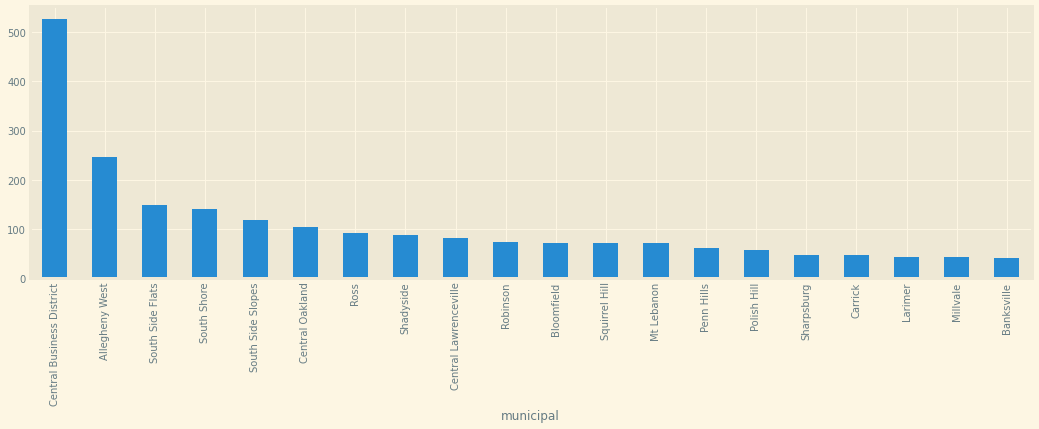

In [70]:
plt.style.use('Solarize_Light2')
numberOfBars.head(20).plot(kind='bar', legend=False,figsize=(16, 5))

In order to make a heat map, I merged the neighborhoods shape file with my number of bars data set

In [71]:
neighborhoods = gp.read_file("neighborhood_data/Neighborhoods_.shp")
barsMap = neighborhoods.merge(numberOfBars, how='left', left_on='hood', right_on='municipal')

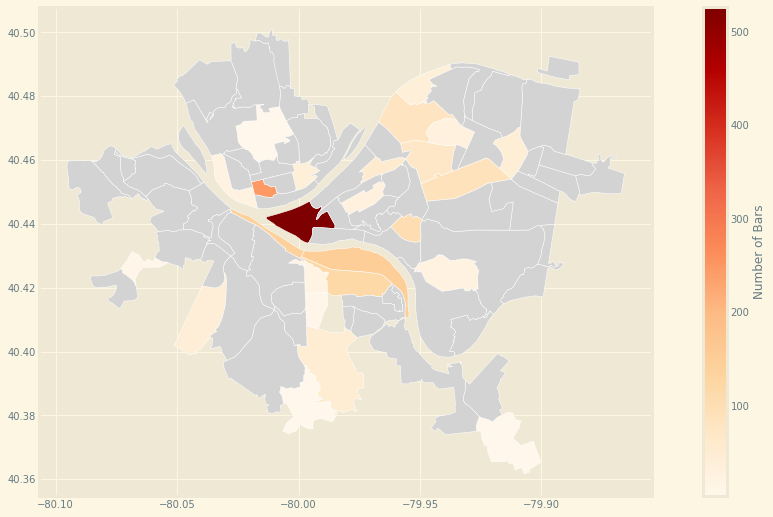

In [72]:
barsMap.plot(column='num', 
               cmap='OrRd',            
               edgecolor="white",    
               legend=True,             
               legend_kwds={'label': "Number of Bars"},
               figsize=(16, 9),       
               missing_kwds={"color": "lightgrey"} 
               )

# The Best Neighborhood

Based on the convenience store metric, the central business district is the best neighborhood and is shown in the graph below. Contenders included oakland and mckeesport. This however is not enough to take a guess at what the best area would be since the weight is only 10%.

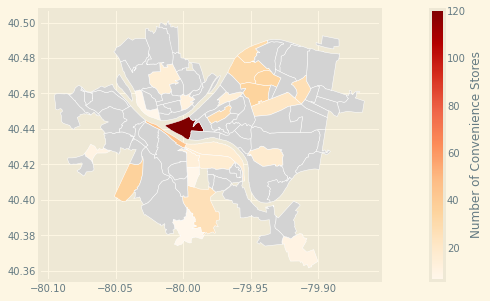

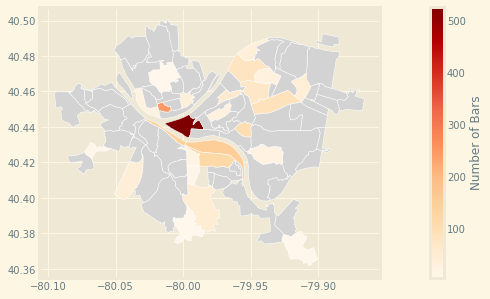

In [75]:
ax = cvMaps.plot(column='# of convenience stores', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Convenience Stores"}, # label the legend
               figsize=(16, 5),         # set the size
               missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               )
barsMap.plot(column='num', 
               cmap='OrRd',            
               edgecolor="white",    
               legend=True,             
               legend_kwds={'label': "Number of Bars"},
               figsize=(16, 5),       
               missing_kwds={"color": "lightgrey"} 
               )

# Conclusion
> <u>Ryan Esquino</u>: Based on convenience stores, the <b>Central Business District</b> would be the best for Homer. Ranks were determined by the number of stores in each area, and then the weight was applied (10%) to use later in our total calcuations. As for the data itself, it is centrailized around the middle of Pittsburgh and begins to decrease exponentially the further away you move from the center. Area was not taken into consideration since Homer is known to prefer quantity over quality. 

> <u>Isaac Samuel</u>: Based on the information we have about bars, <b>Central Business District</b> is clearly the best neighborhood in Pittsburgh since it is densely packed with bars and restaurants that serve alcohol. Looking at the bar graph, one can clearly tell that the majority of neighborhoods in Pittsburgh seem to have less than a fifth of the amount of bars in Central Business District. According to our weighting system, bars have a 40% weight in our total calculations.
<br>&emsp;&emsp;My favorite neighborhood in Pittsburgh is probably Squirrel Hill because I like to walk around in the interesting and expensive neighborhoods. Overall, Squirrel Hill's amount of bars is not too different than the typical neighborhood, but it does still place at number 12.

> <u>General Conclusion</u>: Excluding donut shops, in both our convienience store and bars metrics, Downtown or the Central Business District, was the winner. We have concluded that the Central Business District would be the best place for Homer Simpson to live. 